In [2]:
import pandas as pd
import numpy as np

In [285]:


# Define the directory path where the CSV files are stored
path = r"D:/Work file/bd_real_estate/data/raw"

# Load each file into a separate DataFrame
df1 = pd.read_csv(f"{path}/agargaon_properties.csv")
df2 = pd.read_csv(f"{path}/all_properties.csv")
df3 = pd.read_csv(f"{path}/badda_properties.csv")
df4 = pd.read_csv(f"{path}/Banani_properties.csv")
df5 = pd.read_csv(f"{path}/banasree_properties.csv")
df6 = pd.read_csv(f"{path}/Baridhara_properties.csv")
df7 = pd.read_csv(f"{path}/bashundhara-r-a_properties.csv")
df8 = pd.read_csv(f"{path}/gulshan_properties.csv")
df9 = pd.read_csv(f"{path}/keraniganj_properties.csv")
df10 = pd.read_csv(f"{path}/khilgaon_properties.csv")
df12 = pd.read_csv(f"{path}/mirpur_properties.csv")
df13 = pd.read_csv(f"{path}/mohakhali_properties.csv")
df14 = pd.read_csv(f"{path}/mohammadpur_properties.csv")
df15 = pd.read_csv(f"{path}/Motijheel_properties.csv")
df16 = pd.read_csv(f"{path}/new-market_properties.csv")
# df17 = pd.read_csv(f"{path}/property_listing_data_in_Bangladesh.csv")
df18 = pd.read_csv(f"{path}/rampura_properties.csv")
df19 = pd.read_csv(f"{path}/Tejgaon_properties.csv")
df20 = pd.read_csv(f"{path}/uttora_properties.csv")

In [286]:
all_properties_df = pd.concat([rent_df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, 
                               df12, df13, df14, df15, df16, df18, df19, df20], 
                              ignore_index=True)

In [287]:
df=all_properties_df


In [289]:
df.head()

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg
0,Flat For Sale In Agargaon Close To Agargaon Ja...,"West Agargaon, Agargaon",Lovely apartment is vacant at the moment. You ...,"৳8,500,000",3.0,3.0,1275 sqft,https://www.bproperty.com/buy/dhaka/agargaon/f...,buy,agargaon
1,We Have A 1133 Sq.Ft Flat For Sale In The Loca...,"West Agargaon, Agargaon",The vacant flat surely is a reasonable deal co...,"৳6,231,500",3.0,3.0,1133 sqft,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon
2,We Have A 1295 Sq.Ft Flat For Sale In Taltola .,Agargaon,"Amicable environment, appropriate commuting sy...","৳6,500,000",3.0,2.0,1295 sqft,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon
3,See This 1300 Sq Ft Apartment For Sale Is All ...,Agargaon,This flat consists of facilities you can think...,"৳6,500,000",2.0,2.0,1300 sqft,https://www.bproperty.com/buy/dhaka/agargaon/s...,buy,agargaon
4,A Must See This Apartment For Sale Is All Set ...,"Science Museum To Water Tank Road, Agargaon",Looking for a suitable place to settle in the ...,"৳7,800,000",3.0,3.0,1356 sqft,https://www.bproperty.com/buy/dhaka/agargaon/a...,buy,agargaon


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129 entries, 0 to 6128
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_name      6129 non-null   object 
 1   address            6126 non-null   object 
 2   short_description  6129 non-null   object 
 3   price              6129 non-null   object 
 4   bedrooms           5544 non-null   float64
 5   bathrooms          5544 non-null   float64
 6   floor_area         5901 non-null   object 
 7   property_url       6129 non-null   object 
 8   type               6129 non-null   object 
 9   teg                6129 non-null   object 
dtypes: float64(2), object(8)
memory usage: 479.0+ KB


In [291]:
df.isnull().sum()

property_name          0
address                3
short_description      0
price                  0
bedrooms             585
bathrooms            585
floor_area           228
property_url           0
type                   0
teg                    0
dtype: int64

In [292]:
#address missing - 617,851,870


In [293]:
import joblib
import pandas as pd
import math

# Load the saved model
model1 = joblib.load('Xgboost_model_bath.joblib')

# Function to predict bathrooms and add it to the DataFrame
def predict_bathrooms(row):
    # Check if the bathrooms column is null
    if pd.isnull(row['bathrooms']):
        # Extract relevant data for prediction
        new_data = pd.DataFrame({
            'price': [row['price']],
            'floor_area': [row['floor_area']]
        })
        
        # Align with the model's expected columns
        new_data = new_data.reindex(columns=['price', 'floor_area'], fill_value=0)
        
        # Predict the bathroom count
        predicted_bathrooms = model1.predict(new_data)[0]
        
        # Apply custom rounding
        decimal_part = predicted_bathrooms % 1
        if decimal_part >= 0.7:
            predicted_bathrooms = math.ceil(predicted_bathrooms)  # Round up
        else:
            predicted_bathrooms = math.floor(predicted_bathrooms)  # Round down
        
        return int(predicted_bathrooms)
    else:
        # Return the existing bathrooms value if not null
        return int(row['bathrooms'])

# Example usage:
# Assuming you have a DataFrame 'mis_floor_df' with the relevant columns
# mis_floor_df['predicted_bathrooms'] = mis_floor_df.apply(predict_bathrooms, axis=1)


# Example usage:
# Assuming you have a DataFrame 'df' with columns 'price' and 'floor_area'
# df['predicted_bathrooms'] = df.apply(predict_bathrooms, axis=1)





In [294]:
import joblib
import pandas as pd
import math

# Load the saved model
model1 = joblib.load('Xgboost_model_bed.joblib')

# Function to predict bedrooms and add it to the DataFrame
def predict_bedrooms(row):
    # Check if the bedrooms column is null
    if pd.isnull(row['bedrooms']):
        # Extract relevant data for prediction
        new_data = pd.DataFrame({
            'price': [row['price']],
            'floor_area': [row['floor_area']]
        })
        
        # Align with the model's expected columns
        new_data = new_data.reindex(columns=['price', 'floor_area'], fill_value=0)
        
        # Predict the bedroom count
        predicted_bedrooms = model1.predict(new_data)[0]
        
        # Apply custom rounding
        decimal_part = predicted_bedrooms % 1
        if decimal_part >= 0.7:
            predicted_bedrooms = math.ceil(predicted_bedrooms)  # Round up
        else:
            predicted_bedrooms = math.floor(predicted_bedrooms)  # Round down
        
        return int(predicted_bedrooms)
    else:
        # Return the existing bedrooms value if not null
        return int(row['bedrooms'])

# Example usage:
# Assuming you have a DataFrame 'mis_floor_df' with the relevant columns
# mis_floor_df['predicted_bedrooms'] = mis_floor_df.apply(predict_bedrooms, axis=1)



In [295]:

df[df["bedrooms"].isnull()]

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg
123,A Nicely Constructed Office Of 3650 Sq Ft Can ...,"Kamal Soroni Road, Agargaon","In the amazing location of Agargaon, there is ...","৳32,000,000",NaN,NaN,3650 sqft,https://www.bproperty.com/buy/dhaka/agargaon/a...,buy,agargaon
125,428 Sq Ft Prime Commercial Shop For Sale In Ba...,"Block F, Banasree",This 428 sq ft commercial space in Banasree is...,"৳8,600,000",NaN,NaN,428 sqft,https://www.bproperty.com/buy/dhaka/banasree/4...,buy,dhaka
126,Residential plot for sale of 3640 SQ FT availa...,"Gulshan 1, Gulshan",This residential plot for sale is available to...,"৳500,000,000",NaN,NaN,NaN,https://www.bproperty.com/buy/dhaka/gulshan/re...,buy,dhaka
155,Residential plot for sale of 3640 SQ FT availa...,"Gulshan 1, Gulshan",This residential plot for sale is available to...,"৳500,000,000",NaN,NaN,NaN,https://www.bproperty.com/buy/dhaka/gulshan/re...,buy,dhaka
156,428 Sq Ft Prime Commercial Shop For Sale In Ba...,"Block F, Banasree",This 428 sq ft commercial space in Banasree is...,"৳8,600,000",NaN,NaN,428 sqft,https://www.bproperty.com/buy/dhaka/banasree/4...,buy,dhaka
...,...,...,...,...,...,...,...,...,...,...
6062,A Commercial Shop Of 289 Sq Ft Is Ready For Sa...,"Sector 7, Uttara","In the amazing location of Uttara, there is a ...","৳15,000,000",NaN,NaN,289 sqft,https://www.bproperty.com/buy/dhaka/uttara/a-c...,buy,uttora
6078,A Commercial Shop Of 289 Sq Ft Is Ready For Sa...,"Sector 7, Uttara","In the amazing location of Uttara, there is a ...","৳15,000,000",NaN,NaN,289 sqft,https://www.bproperty.com/buy/dhaka/uttara/a-c...,buy,uttora
6117,Grab This 5 Katha Commercial Plot Available Fo...,"Gareeb-e-Nawaz Avenue, Uttara",Ready to make a wise investment for your next ...,"৳200,000,000",NaN,NaN,3600 sqft,https://www.bproperty.com/buy/dhaka/uttara/gra...,buy,uttora
6119,5 Katha Plot Is Now Available For Sale In Utta...,"Sector 16, Uttara",This plot is designed with your desired home i...,"৳80,000,000",NaN,NaN,3600 sqft,https://www.bproperty.com/buy/dhaka/uttara/5-k...,buy,uttora


In [296]:
df.isnull().sum()

property_name          0
address                3
short_description      0
price                  0
bedrooms             585
bathrooms            585
floor_area           228
property_url           0
type                   0
teg                    0
dtype: int64

In [297]:
df.shape

(6129, 10)

In [298]:
df.duplicated().sum()

np.int64(860)

In [299]:
df.shape

(6129, 10)

In [300]:
df = df.drop_duplicates()


In [301]:
df.shape

(5269, 10)

In [302]:
df.isnull().sum()

property_name          0
address                3
short_description      0
price                  0
bedrooms             516
bathrooms            516
floor_area           200
property_url           0
type                   0
teg                    0
dtype: int64

In [303]:
df.shape

(5269, 10)

In [304]:
df = df.dropna(subset=['floor_area', 'price'])

In [305]:
df['floor_area'] = df['floor_area'].replace('[ sqft]', '', regex=True).astype(float)
df['price'] = df['price'].replace('[৳,]', '', regex=True).astype(float)

In [306]:
df['bathrooms'] = df.apply(predict_bathrooms, axis=1)
df['bedrooms'] = df.apply(predict_bedrooms, axis=1)

In [307]:
df.isnull().sum()

property_name        0
address              3
short_description    0
price                0
bedrooms             0
bathrooms            0
floor_area           0
property_url         0
type                 0
teg                  0
dtype: int64

In [251]:
df.head()

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft,sub_area,area
0,Flat For Sale In Agargaon Close To Agargaon Ja...,"West Agargaon, Agargaon",lovely apartment is vacant at the moment you g...,8500000.0,3,3,1275.0,https://www.bproperty.com/buy/dhaka/agargaon/f...,buy,agargaon,6666.666667,West Agargaon,Agargaon
1,We Have A 1133 Sq.Ft Flat For Sale In The Loca...,"West Agargaon, Agargaon",the vacant flat surely is a reasonable deal co...,6231500.0,3,3,1133.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon,5500.000000,West Agargaon,Agargaon
2,We Have A 1295 Sq.Ft Flat For Sale In Taltola .,Agargaon,amicable environment appropriate commuting sys...,6500000.0,3,2,1295.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon,5019.305019,Agargaon,None
3,See This 1300 Sq Ft Apartment For Sale Is All ...,Agargaon,this flat consists of facilities you can think...,6500000.0,2,2,1300.0,https://www.bproperty.com/buy/dhaka/agargaon/s...,buy,agargaon,5000.000000,Agargaon,None
4,A Must See This Apartment For Sale Is All Set ...,"Science Museum To Water Tank Road, Agargaon",looking for a suitable place to settle in the ...,7800000.0,3,3,1356.0,https://www.bproperty.com/buy/dhaka/agargaon/a...,buy,agargaon,5752.212389,Science Museum To Water Tank Road,Agargaon


In [309]:
df.shape

(5069, 10)

In [252]:
df.to_csv(r"D:\Work file\bd_real_estate\data\raw\processed_data.csv")

In [253]:
df.head()

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft,sub_area,area
0,Flat For Sale In Agargaon Close To Agargaon Ja...,"West Agargaon, Agargaon",lovely apartment is vacant at the moment you g...,8500000.0,3,3,1275.0,https://www.bproperty.com/buy/dhaka/agargaon/f...,buy,agargaon,6666.666667,West Agargaon,Agargaon
1,We Have A 1133 Sq.Ft Flat For Sale In The Loca...,"West Agargaon, Agargaon",the vacant flat surely is a reasonable deal co...,6231500.0,3,3,1133.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon,5500.000000,West Agargaon,Agargaon
2,We Have A 1295 Sq.Ft Flat For Sale In Taltola .,Agargaon,amicable environment appropriate commuting sys...,6500000.0,3,2,1295.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon,5019.305019,Agargaon,None
3,See This 1300 Sq Ft Apartment For Sale Is All ...,Agargaon,this flat consists of facilities you can think...,6500000.0,2,2,1300.0,https://www.bproperty.com/buy/dhaka/agargaon/s...,buy,agargaon,5000.000000,Agargaon,None
4,A Must See This Apartment For Sale Is All Set ...,"Science Museum To Water Tank Road, Agargaon",looking for a suitable place to settle in the ...,7800000.0,3,3,1356.0,https://www.bproperty.com/buy/dhaka/agargaon/a...,buy,agargaon,5752.212389,Science Museum To Water Tank Road,Agargaon


In [254]:
df['short_description'] = df['short_description'].str.lower()

In [255]:


# Clean the 'short_description' column to keep only letters and numbers
df["short_description"] = df["short_description"].str.replace(r'[^A-Za-z0-9 ]', '', regex=True)


In [256]:
df.shape

(5039, 13)

In [257]:
df["short_description"] = df["short_description"].apply(lambda x: ' '.join(str(x).split()))


In [359]:
df.sample()

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg
2437,Reside Conveniently In This Well Constructed F...,"Block F, Bashundhara R-A",want to get a budget friendly apartment in bas...,14000000.0,3,4,1796.0,https://www.bproperty.com/buy/dhaka/bashundhar...,buy,bashundora


In [372]:
df.isnull().sum()

property_name        0
address              0
short_description    0
price                0
bedrooms             0
bathrooms            0
floor_area           0
property_url         0
type                 0
teg                  0
dtype: int64

In [371]:
df[df["address"].isnull()]

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg


In [369]:
#address missing - 617,851,870
# df.loc[617,'address'] ='kalachandpur'
# df.loc[851,'address'] ='Kuril'
df.loc[870,'address']  ='Kuril'

In [370]:
df.loc[870,'address']

'Kuril'

In [374]:
df.duplicated().sum()

np.int64(0)

In [258]:
df= pd.read_csv(r"D:\Work file\bd_real_estate\data\processed\processed_data.csv")

In [259]:
df.head(3)

,Unnamed: 0,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg
0,0,Flat For Sale In Agargaon Close To Agargaon Ja...,"West Agargaon, Agargaon",lovely apartment is vacant at the moment you g...,8500000.0,3,3,1275.0,https://www.bproperty.com/buy/dhaka/agargaon/f...,buy,agargaon
1,1,We Have A 1133 Sq.Ft Flat For Sale In The Loca...,"West Agargaon, Agargaon",the vacant flat surely is a reasonable deal co...,6231500.0,3,3,1133.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon
2,2,We Have A 1295 Sq.Ft Flat For Sale In Taltola .,Agargaon,amicable environment appropriate commuting sys...,6500000.0,3,2,1295.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon


In [260]:
def calculate_price_per_sqft(price, floor_area):
    if floor_area <= 0:
        raise ValueError("Floor area must be greater than zero.")
    return price / floor_area

df['price_per_sqft'] = df.apply(lambda x: calculate_price_per_sqft(x['price'], x['floor_area']), axis=1)


In [261]:
df.drop(df[df['bedrooms'] >= 10].index, inplace=True)


In [262]:
df=df.drop(columns="Unnamed: 0")

In [263]:
df[df['bathrooms'] >= 10]


,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft
384,945 SFT Budget-Friendly Apartment For sale At ...,"Priyanka City, Uttara",a convenient 945 sq ft flat in the bustling ar...,6500000.0,3,32,945.0,https://www.bproperty.com/buy/dhaka/uttara/945...,buy,dhaka,6878.306878
4571,945 SFT Budget-Friendly Apartment For sale At ...,"Priyanka City, Uttara",a convenient 945 sq ft flat in the bustling ar...,6500000.0,3,32,945.0,https://www.bproperty.com/buy/dhaka/uttara/945...,buy,uttora,6878.306878


In [264]:
df

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft
0,Flat For Sale In Agargaon Close To Agargaon Ja...,"West Agargaon, Agargaon",lovely apartment is vacant at the moment you g...,8500000.0,3,3,1275.0,https://www.bproperty.com/buy/dhaka/agargaon/f...,buy,agargaon,6666.666667
1,We Have A 1133 Sq.Ft Flat For Sale In The Loca...,"West Agargaon, Agargaon",the vacant flat surely is a reasonable deal co...,6231500.0,3,3,1133.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon,5500.000000
2,We Have A 1295 Sq.Ft Flat For Sale In Taltola .,Agargaon,amicable environment appropriate commuting sys...,6500000.0,3,2,1295.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon,5019.305019
3,See This 1300 Sq Ft Apartment For Sale Is All ...,Agargaon,this flat consists of facilities you can think...,6500000.0,2,2,1300.0,https://www.bproperty.com/buy/dhaka/agargaon/s...,buy,agargaon,5000.000000
4,A Must See This Apartment For Sale Is All Set ...,"Science Museum To Water Tank Road, Agargaon",looking for a suitable place to settle in the ...,7800000.0,3,3,1356.0,https://www.bproperty.com/buy/dhaka/agargaon/a...,buy,agargaon,5752.212389
...,...,...,...,...,...,...,...,...,...,...,...
5064,Convenient Price! Lovely View! 1586 Sq Ft Flat...,"Sector 4, Uttara",uttara offers you this lovely home which is va...,14200000.0,3,3,1586.0,https://www.bproperty.com/buy/dhaka/uttara/con...,buy,uttora,8953.341740
5065,1120 Sq Ft Apartment With 3 Amazing Beds Is Up...,"Sector 10, Uttara",this home situated in a great location which w...,6000000.0,3,2,1120.0,https://www.bproperty.com/buy/dhaka/uttara/112...,buy,uttora,5357.142857
5066,886 Sq Ft Fine Flat Is Now For Sale Which Is I...,"Sector 14, Uttara",we bring you a beautiful and distinct flat for...,7800000.0,3,3,886.0,https://www.bproperty.com/buy/dhaka/uttara/886...,buy,uttora,8803.611738
5067,Worthy 1100 SQ FT residence is for sale at Utt...,"Sector 10, Uttara",just after entering this vacant flat you will ...,6400000.0,3,2,1100.0,https://www.bproperty.com/buy/dhaka/uttara/wor...,buy,uttora,5818.181818


In [265]:
df.loc[384,'bathrooms']  =2
df.loc[4571,'bathrooms']  =2

In [266]:
df.drop(4571, inplace=True)

In [267]:
df["teg"].value_counts()



teg
mirpur         1169
dhaka          1090
bashundora      752
uttora          521
badda           388
mohammadpur     294
banasree        248
agargaon        118
rampura          93
khilgaon         79
banani           56
tejgaon          50
Motijheel        44
gulshan          43
mohakhali        30
new-market       29
keraniganj       27
Baridara          8
Name: count, dtype: int64

In [268]:
df[df["teg"] == "mirpur"]["address"].value_counts()

address
Pallabi, Mirpur                     97
Section 12, Mirpur                  91
West Shewrapara, Mirpur             84
Pirerbag, Mirpur                    83
Section 10, Mirpur                  81
Section 1, Mirpur                   77
Section 11, Mirpur                  66
Section 2, Mirpur                   63
Ahmed Nagar, Mirpur                 62
Section 6, Mirpur                   56
Middle Monipur, Mirpur              46
Mirpur DOHS, Mirpur                 44
Rupnagar R/A, Mirpur                39
East Kazipara, Mirpur               35
Middle Paikpara, Mirpur             29
Kallyanpur, Mirpur                  28
East Shewrapara, Mirpur             25
Paikpara, Mirpur                    22
Darussalam, Mirpur                  20
East Monipur, Mirpur                17
Section 15, Mirpur                  17
West Monipur, Mirpur                14
West Kazipara, Mirpur               11
South Monipur, Mirpur               10
2nd Colony, Mirpur                   9
Dakkhin Paikpara,

In [269]:
mir_df=df[df["teg"] == "mirpur"]

In [270]:
mir_df

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft
2827,Ready Flat Is Now For Sale In Mirpur Dohs Near...,"Mirpur DOHS, Mirpur",ready to move in somewhere with everything nea...,25000000.0,4,4,2200.0,https://www.bproperty.com/buy/dhaka/mirpur/rea...,buy,mirpur,11363.636364
2828,1420 Sq Ft Residential Apartment Is On Sale In...,"Section 6, Mirpur",looking for a brand new apartment in mirpurthi...,10800000.0,3,3,1420.0,https://www.bproperty.com/buy/dhaka/mirpur/142...,buy,mirpur,7605.633803
2829,Buy This 800 Sq Ft Apartment In Mirpur 1,"Section 1, Mirpur",are you concerned about finding a home which w...,4360000.0,2,2,800.0,https://www.bproperty.com/buy/dhaka/mirpur/buy...,buy,mirpur,5450.000000
2830,1100 Sq Ft Great Apartment For Sale In Mirpur 1,"Section 1, Mirpur",discover the epitome of modern urban living in...,6500000.0,3,3,1100.0,https://www.bproperty.com/buy/dhaka/mirpur/110...,buy,mirpur,5909.090909
2831,1100 Sq Ft Apartment For Sale In Mirpur 1,"Section 1, Mirpur",we are here to assist you if you are thinking ...,6500000.0,3,3,1100.0,https://www.bproperty.com/buy/dhaka/mirpur/110...,buy,mirpur,5909.090909
...,...,...,...,...,...,...,...,...,...,...,...
3994,"Live In This 1530 Sq Ft Flat For Sale, Ready T...","Section 10, Mirpur",we are here to assist you if you are thinking ...,12000000.0,3,3,1530.0,https://www.bproperty.com/buy/dhaka/mirpur/liv...,buy,mirpur,7843.137255
3995,Grab This Lovely Flat For Sale In Mirpur Befor...,"Section 12, Mirpur",looking for the most favorable flat in mirpur ...,6000000.0,4,3,1421.0,https://www.bproperty.com/buy/dhaka/mirpur/gra...,buy,mirpur,4222.378607
3996,Buy This 1525 Sq Ft Apartment Ready For Sale I...,"Section 12, Mirpur",waiting for winning a ready flat in mirpur you...,9000000.0,3,3,1525.0,https://www.bproperty.com/buy/dhaka/mirpur/buy...,buy,mirpur,5901.639344
3998,Buy This 1600 Sq Ft Pleasant Flat With Standar...,"Section 1, Mirpur",if you are looking for a home that will make y...,10000000.0,4,4,1600.0,https://www.bproperty.com/buy/dhaka/mirpur/buy...,buy,mirpur,6250.000000


In [271]:
df[['sub_area', 'area']] = df['address'].str.split(',', expand=True)

In [272]:
df

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft,sub_area,area
0,Flat For Sale In Agargaon Close To Agargaon Ja...,"West Agargaon, Agargaon",lovely apartment is vacant at the moment you g...,8500000.0,3,3,1275.0,https://www.bproperty.com/buy/dhaka/agargaon/f...,buy,agargaon,6666.666667,West Agargaon,Agargaon
1,We Have A 1133 Sq.Ft Flat For Sale In The Loca...,"West Agargaon, Agargaon",the vacant flat surely is a reasonable deal co...,6231500.0,3,3,1133.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon,5500.000000,West Agargaon,Agargaon
2,We Have A 1295 Sq.Ft Flat For Sale In Taltola .,Agargaon,amicable environment appropriate commuting sys...,6500000.0,3,2,1295.0,https://www.bproperty.com/buy/dhaka/agargaon/w...,buy,agargaon,5019.305019,Agargaon,None
3,See This 1300 Sq Ft Apartment For Sale Is All ...,Agargaon,this flat consists of facilities you can think...,6500000.0,2,2,1300.0,https://www.bproperty.com/buy/dhaka/agargaon/s...,buy,agargaon,5000.000000,Agargaon,None
4,A Must See This Apartment For Sale Is All Set ...,"Science Museum To Water Tank Road, Agargaon",looking for a suitable place to settle in the ...,7800000.0,3,3,1356.0,https://www.bproperty.com/buy/dhaka/agargaon/a...,buy,agargaon,5752.212389,Science Museum To Water Tank Road,Agargaon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,Convenient Price! Lovely View! 1586 Sq Ft Flat...,"Sector 4, Uttara",uttara offers you this lovely home which is va...,14200000.0,3,3,1586.0,https://www.bproperty.com/buy/dhaka/uttara/con...,buy,uttora,8953.341740,Sector 4,Uttara
5065,1120 Sq Ft Apartment With 3 Amazing Beds Is Up...,"Sector 10, Uttara",this home situated in a great location which w...,6000000.0,3,2,1120.0,https://www.bproperty.com/buy/dhaka/uttara/112...,buy,uttora,5357.142857,Sector 10,Uttara
5066,886 Sq Ft Fine Flat Is Now For Sale Which Is I...,"Sector 14, Uttara",we bring you a beautiful and distinct flat for...,7800000.0,3,3,886.0,https://www.bproperty.com/buy/dhaka/uttara/886...,buy,uttora,8803.611738,Sector 14,Uttara
5067,Worthy 1100 SQ FT residence is for sale at Utt...,"Sector 10, Uttara",just after entering this vacant flat you will ...,6400000.0,3,2,1100.0,https://www.bproperty.com/buy/dhaka/uttara/wor...,buy,uttora,5818.181818,Sector 10,Uttara


In [290]:
df2=pd.read_csv(r"D:\Work file\bd_real_estate\data\raw\data2.csv")

In [291]:
df2.head(2)

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand


In [292]:
# Filter the DataFrame to get all rows where 'address' contains 'Dhaka'
rent_df=df2[df2["adress"].str.contains("Dhaka", na=False)]




In [293]:
rent_df.shape

(5332, 11)

In [294]:
rent_df = rent_df.sample(n=4000, random_state=42) # random_state ensures reproducibility

In [295]:
rent_df.isnull().sum()

title          0
beds           0
bath           0
area           0
adress         0
type           0
purpose        0
flooPlan       0
url            0
lastUpdated    0
price          0
dtype: int64

In [296]:
rent_df.duplicated().sum()

np.int64(0)

In [297]:
# Remove commas and ' sqft' from the 'area' column and convert it to float
rent_df['area'] = rent_df['area'].replace({',': '', ' sqft': ''}, regex=True).astype(float)

# rent_df['price'] = rent_df['price'].replace('[৳,]', '', regex=True).astype(float)

In [298]:
# df[df["price"] == "mirpur"]["address"].value_counts()

In [299]:

def convert_price(price):
    if 'Thousand' in price:
        return float(price.replace(' Thousand', '')) * 1000
    elif 'Lakh' in price:
        return float(price.replace(' Lakh', '')) * 100000
    else:
        return price

# Apply the function to the 'price' column
rent_df['price'] = rent_df['price'].apply(convert_price)




In [303]:
rent_df.sample()


,title,beds,bath,area,adress,type,purpose,url,price,sub_Area,Area
5227,Make your residence in a 1000 SQ FT rental fla...,2,2,1000.0,"Sector 12, Uttara, Dhaka",Apartment,For Rent,https://www.bproperty.com/en/property/details-...,15000.0,Sector 12,Uttara


In [301]:
rent_df=rent_df.drop(columns='flooPlan')
rent_df=rent_df.drop(columns='lastUpdated')


In [302]:
rent_df[['sub_Area', 'Area']] = rent_df['adress'].str.replace(", Dhaka", "").str.split(', ', expand=True, n=1)



In [309]:
df.to_csv(r"D:\Work file\bd_real_estate\data\processed\processed_buy_data.csv")
rent_df.to_csv(r"D:\Work file\bd_real_estate\data\processed\processed_rent_data.csv")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df1 = pd.read_csv(r'D:\Work file\bd_real_estate\data\processed\processed_buy_data.csv', index_col=0)



In [5]:
df1.head(1)

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft,sub_area,area
0,Flat For Sale In Agargaon Close To Agargaon Ja...,"West Agargaon, Agargaon",lovely apartment is vacant at the moment you g...,8500000.0,3,3,1275.0,https://www.bproperty.com/buy/dhaka/agargaon/f...,buy,agargaon,6666.666667,West Agargaon,Agargaon


In [6]:
df1.columns

Index(['property_name', 'address', 'short_description', 'price', 'bedrooms',
       'bathrooms', 'floor_area', 'property_url', 'type', 'teg',
       'price_per_sqft', 'sub_area', 'area'],
      dtype='object')

D:\Users1\ibr50\AppData\Local\Temp\ipykernel_88436\2807983532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price'])


<Axes: xlabel='price', ylabel='Density'>

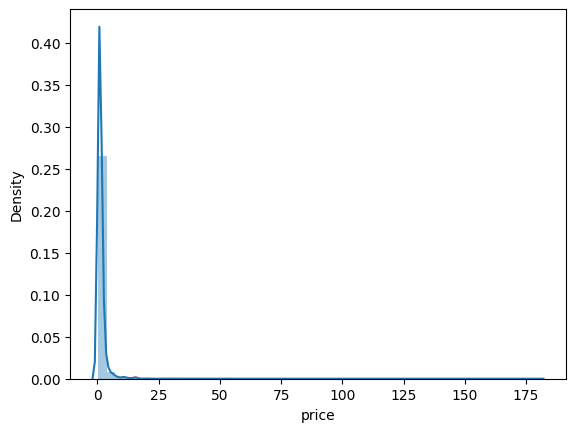

In [75]:
sns.distplot(df1['price'])

In [14]:
df1['price']=df1['price'].astype('float')

In [8]:
df1['price']=df1['price'].apply(lambda x: f"{x / 10000000:.2f}")


In [9]:
df1.head(1)

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft,sub_area,area
0,Flat For Sale In Agargaon Close To Agargaon Ja...,"West Agargaon, Agargaon",lovely apartment is vacant at the moment you g...,0.85,3,3,1275.0,https://www.bproperty.com/buy/dhaka/agargaon/f...,buy,agargaon,6666.666667,West Agargaon,Agargaon


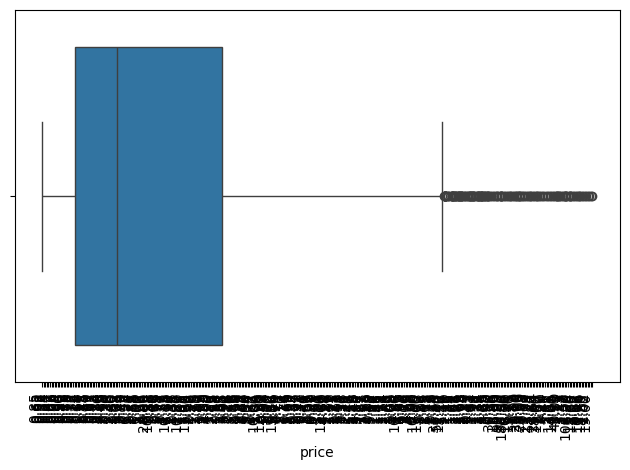

In [12]:
sns.boxplot(x=df1['price'])
plt.xticks(rotation=90, ha='right')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5039 entries, 0 to 5068
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_name      5039 non-null   object 
 1   address            5039 non-null   object 
 2   short_description  5039 non-null   object 
 3   price              5039 non-null   float64
 4   bedrooms           5039 non-null   int64  
 5   bathrooms          5039 non-null   int64  
 6   floor_area         5039 non-null   float64
 7   property_url       5039 non-null   object 
 8   type               5039 non-null   object 
 9   teg                5039 non-null   object 
 10  price_per_sqft     5039 non-null   float64
 11  sub_area           5039 non-null   object 
 12  area               4996 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 551.1+ KB


In [16]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1[(df1['price'] < lower_bound) | (df1['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(428,
 count    428.000000
 mean       6.924136
 std       11.969200
 min        2.600000
 25%        3.100000
 50%        4.000000
 75%        6.500000
 max      180.000000
 Name: price, dtype: float64)

In [17]:
outliers.sort_values('price',ascending=False).head(20)

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft,sub_area,area
2699,Grand 17028 Square Feet (23.65 Katha) Resident...,"Gulshan 1, Gulshan",are you looking for a rare and exclusive prope...,180.00,8,8,17028.0,https://www.bproperty.com/buy/dhaka/gulshan/gr...,buy,gulshan,105708.245243,Gulshan 1,Gulshan
4743,80000 Sq Ft Luxurious Commercial Full Building...,"Sector 13, Uttara",if finding a great business space within your ...,108.00,8,8,80000.0,https://www.bproperty.com/buy/dhaka/uttara/800...,buy,uttora,13500.000000,Sector 13,Uttara
2692,20.22 katha Residential Plot For Sale in Gulsh...,"Gulshan 2, Gulshan",as time passes the requirements of people are ...,90.00,8,8,14560.0,https://www.bproperty.com/buy/dhaka/gulshan/20...,buy,gulshan,61813.186813,Gulshan 2,Gulshan
1917,A Perfect Residential 5.9 Plot With Full Build...,"Block K, Baridhara",this lucrative plot with full building has a l...,52.00,4,4,4248.0,https://www.bproperty.com/buy/dhaka/baridhara/...,buy,Baridara,122410.546139,Block K,Baridhara
4655,"Spacious Commercial Building Of 21,000 Sq Ft I...","Sector 11, Uttara",located in uttara one of the busiest areas of ...,40.00,8,8,21000.0,https://www.bproperty.com/buy/dhaka/uttara/spa...,buy,uttora,19047.619048,Sector 11,Uttara
4384,8.5 Katha Plot with two 5 storied full buildin...,"Elephant Road, New Market",this plot is designed with your desired home i...,38.00,4,4,6120.0,https://www.bproperty.com/buy/dhaka/new-market...,buy,new-market,62091.503268,Elephant Road,New Market
3610,Residential Full Building For Sale In Mirpur- ...,"Section 11, Mirpur",good news for the home hunters if you are plan...,35.00,7,8,39200.0,https://www.bproperty.com/buy/dhaka/mirpur/res...,buy,mirpur,8928.571429,Section 11,Mirpur
2693,5 Katha Plot For Sale In Gulshan,"Gulshan 1, Gulshan",if your goal is to structure your own home in ...,32.50,4,4,3640.0,https://www.bproperty.com/buy/dhaka/gulshan/5-...,buy,gulshan,89285.714286,Gulshan 1,Gulshan
1911,"We Are Offering You A Very Spacious 10,446 Sq ...","Block K, Baridhara",discover the epitome of luxury living in this ...,31.34,6,6,10446.0,https://www.bproperty.com/buy/dhaka/baridhara/...,buy,Baridara,30000.000000,Block K,Baridhara
2681,Ideal 8.08 Katha Plot For Sale In Gulshan 1,"Gulshan 1, Gulshan",if your goal is to structure your own home in ...,30.00,4,4,5824.0,https://www.bproperty.com/buy/dhaka/gulshan/id...,buy,gulshan,51510.989011,Gulshan 1,Gulshan


D:\Users1\ibr50\AppData\Local\Temp\ipykernel_88436\1772967784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

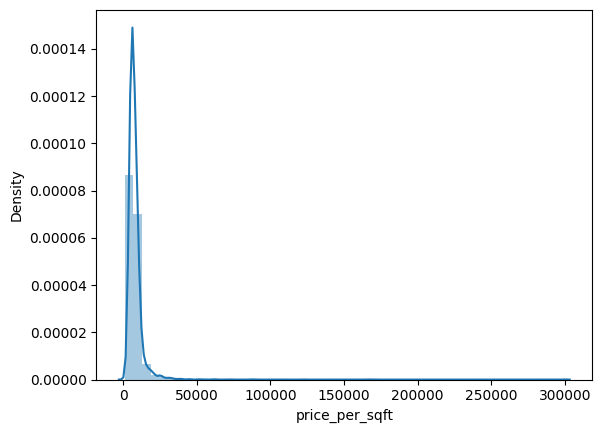

In [48]:
sns.distplot(df1['price_per_sqft'])

In [18]:
# Calculate the IQR for the 'price' column
Q1 = df1['price_per_sqft'].quantile(0.25)
Q3 = df1['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df1[(df1['price_per_sqft'] < lower_bound) | (df1['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(261,
 count       261.000000
 mean      25474.376664
 std       24290.331279
 min       14285.714286
 25%       16274.238227
 50%       19047.619048
 75%       25162.386409
 max      299250.000000
 Name: price_per_sqft, dtype: float64)

In [19]:
outliers_sqft['price_per_sqft'] 

118     14989.293362
119     20093.457944
161     25000.000000
162     25000.000000
175     15000.000000
            ...     
5013    51903.114187
5054    21621.621622
5057    55555.555556
5059    22222.222222
5063    32334.921715
Name: price_per_sqft, Length: 261, dtype: float64

D:\Users1\ibr50\AppData\Local\Temp\ipykernel_110912\1772967784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

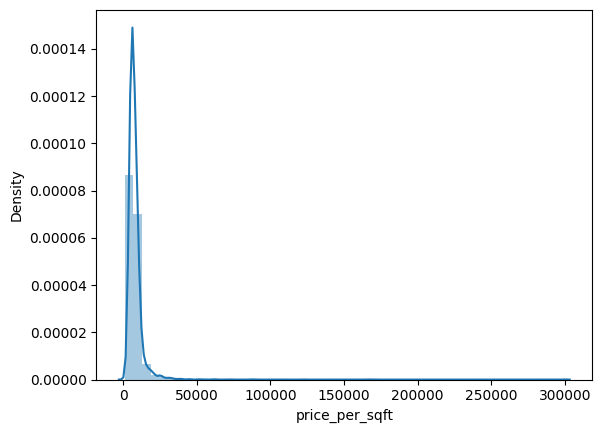

In [20]:
sns.distplot(df1['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

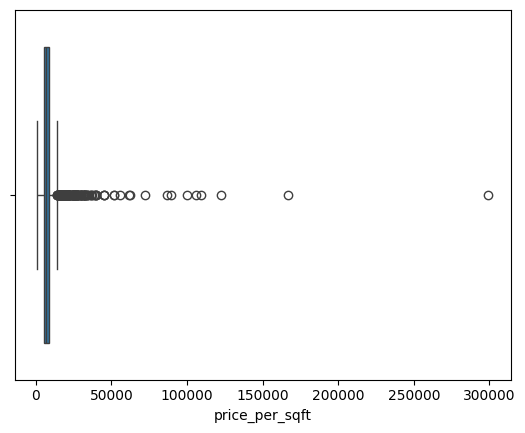

In [21]:
sns.boxplot(x=df1['price_per_sqft'])

In [84]:
df1[df1['price_per_sqft']>50000]

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft,sub_area,area
1632,512 Sq Ft Shop Space For Sale In A Vibrant Loc...,"Road No 11, Banani",this commercial property situated in a great l...,5.12,0,0,512.0,https://www.bproperty.com/buy/dhaka/banani/512...,buy,banani,100000.000000,Road No 11,Banani
1917,A Perfect Residential 5.9 Plot With Full Build...,"Block K, Baridhara",this lucrative plot with full building has a l...,52.00,4,4,4248.0,https://www.bproperty.com/buy/dhaka/baridhara/...,buy,Baridara,122410.546139,Block K,Baridhara
2681,Ideal 8.08 Katha Plot For Sale In Gulshan 1,"Gulshan 1, Gulshan",if your goal is to structure your own home in ...,30.00,4,4,5824.0,https://www.bproperty.com/buy/dhaka/gulshan/id...,buy,gulshan,51510.989011,Gulshan 1,Gulshan
2692,20.22 katha Residential Plot For Sale in Gulsh...,"Gulshan 2, Gulshan",as time passes the requirements of people are ...,90.00,8,8,14560.0,https://www.bproperty.com/buy/dhaka/gulshan/20...,buy,gulshan,61813.186813,Gulshan 2,Gulshan
2693,5 Katha Plot For Sale In Gulshan,"Gulshan 1, Gulshan",if your goal is to structure your own home in ...,32.50,4,4,3640.0,https://www.bproperty.com/buy/dhaka/gulshan/5-...,buy,gulshan,89285.714286,Gulshan 1,Gulshan
2699,Grand 17028 Square Feet (23.65 Katha) Resident...,"Gulshan 1, Gulshan",are you looking for a rare and exclusive prope...,180.00,8,8,17028.0,https://www.bproperty.com/buy/dhaka/gulshan/gr...,buy,gulshan,105708.245243,Gulshan 1,Gulshan
4374,This Exclusive Commercial Shop Of 20 Sq Ft Is ...,"Elephant Road, New Market",expanding your business to one of the most luc...,0.60,1,1,20.0,https://www.bproperty.com/buy/dhaka/new-market...,buy,new-market,299250.000000,Elephant Road,New Market
4377,This Nice Business Shop Space Of 90 Sq Ft Is L...,"Elephant Road, New Market",a deal too good to pass by yes we have the new...,1.50,1,1,90.0,https://www.bproperty.com/buy/dhaka/new-market...,buy,new-market,166666.666667,Elephant Road,New Market
4384,8.5 Katha Plot with two 5 storied full buildin...,"Elephant Road, New Market",this plot is designed with your desired home i...,38.00,4,4,6120.0,https://www.bproperty.com/buy/dhaka/new-market...,buy,new-market,62091.503268,Elephant Road,New Market
4785,110 Square Feet Shop Is Ready For Sale At Utta...,"Sector 3, Uttara",do you aspire to grow your business see this v...,1.20,1,1,110.0,https://www.bproperty.com/buy/dhaka/uttara/110...,buy,uttora,109090.909091,Sector 3,Uttara


In [22]:
df1 = df1[df1['price_per_sqft'] <= 35000]

<Axes: xlabel='price_per_sqft'>

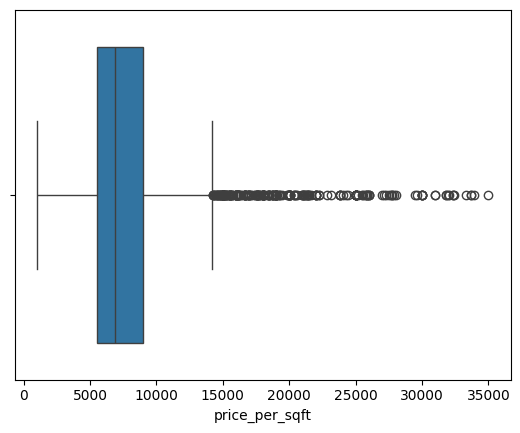

In [23]:
sns.boxplot(x=df1['price_per_sqft'])

D:\Users1\ibr50\AppData\Local\Temp\ipykernel_110912\3644056508.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['floor_area'])


<Axes: xlabel='floor_area', ylabel='Density'>

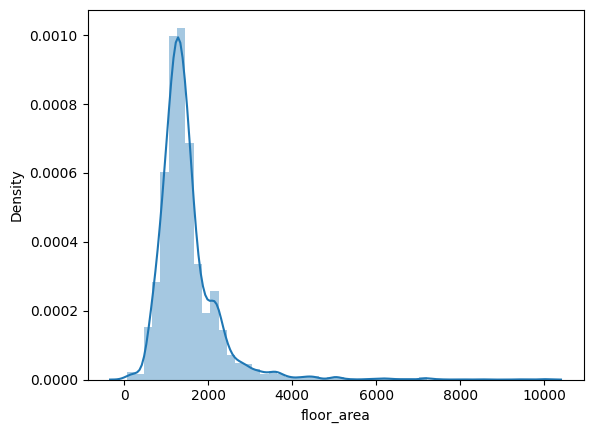

In [29]:
sns.distplot(df1['floor_area'])

In [25]:
df1['floor_area'].describe()

count     5014.000000
mean      1572.227962
std       1673.267102
min         64.000000
25%       1100.000000
50%       1350.000000
75%       1654.000000
max      80000.000000
Name: floor_area, dtype: float64

In [26]:
df1=df1[df1['floor_area'] <= 10000]


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 0 to 5068
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_name      4989 non-null   object 
 1   address            4989 non-null   object 
 2   short_description  4989 non-null   object 
 3   price              4989 non-null   float64
 4   bedrooms           4989 non-null   int64  
 5   bathrooms          4989 non-null   int64  
 6   floor_area         4989 non-null   float64
 7   property_url       4989 non-null   object 
 8   type               4989 non-null   object 
 9   teg                4989 non-null   object 
 10  price_per_sqft     4989 non-null   float64
 11  sub_area           4989 non-null   object 
 12  area               4946 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 545.7+ KB


In [28]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

In [47]:
df1

,property_name,address,short_description,price,bedrooms,bathrooms,floor_area,property_url,type,teg,price_per_sqft,sub_area,area
2066,Get This Well Defined 2200 Sq Ft Flat For Sale...,"Block D, Bashundhara R-A",in a very busy city like dhaka everyone trance...,26000000.0,3,4,2200.0,https://www.bproperty.com/buy/dhaka/bashundhar...,buy,bashundora,11818.181818,Block D,Bashundhara R-A
3655,"Grab This Nice 1350 Sq Ft Home in Pirerbag, To...","Pirerbag, Mirpur",great news for the flat hunters who are lookin...,7600000.0,3,3,1350.0,https://www.bproperty.com/buy/dhaka/mirpur/gra...,buy,mirpur,5629.629630,Pirerbag,Mirpur
4138,"1960 Sq Ft Apartment For Sale In Mohammadpur, ...","Babar Road, Mohammadpur",great news for the apartment searchers if you ...,23520000.0,4,4,1960.0,https://www.bproperty.com/buy/dhaka/mohammadpu...,buy,mohammadpur,12000.000000,Babar Road,Mohammadpur


In [46]:
# df1.apply(lambda x: X[X['area'].isnull()] x[area]=="NaN", replace=area ,sub_area)
df1['area'] = df1.apply(lambda x: x['sub_area'] if pd.isnull(x['area']) else x['area'], axis=1)


In [48]:
X = df1.drop(columns=['price','property_name','address','short_description','property_url','type','teg','sub_area'])
y = df1['price']

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5039 entries, 0 to 5068
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        5039 non-null   int64  
 1   bathrooms       5039 non-null   int64  
 2   floor_area      5039 non-null   float64
 3   price_per_sqft  5039 non-null   float64
 4   area            5039 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 236.2+ KB


In [69]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

In [70]:
# columns_to_encode = ['area']

In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import category_encoders as ce

# Assuming df is your original DataFrame
# Make copies of columns if you want to avoid altering the original data
df_num = df1[['bedrooms', 'bathrooms', 'floor_area']].copy()
df_cat = df1[['area']].copy()


# Step 1: Standard scaling of numerical features
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Step 2: Ordinal encoding of categorical features
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = pd.DataFrame(ordinal_encoder.fit_transform(df_cat), columns=df_cat.columns)



# Step 5: Combine all processed columns back into a single DataFrame
df_preprocessed = pd.concat([df_num_scaled, df_cat_encoded], axis=1)

# Now, df_preprocessed has all the transformations applied
print(df_preprocessed.head())


   bedrooms  bathrooms  floor_area  area
0 -0.032325   0.008970   -0.179338   2.0
1 -0.032325   0.008970   -0.262916   2.0
2 -0.032325  -1.042168   -0.167567  59.0
3 -1.257042  -1.042168   -0.164624  59.0
4 -0.032325   0.008970   -0.131664   2.0


In [99]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Updating the OrdinalEncoder to handle unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedrooms', 'bathrooms', 'floor_area']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['area']),
    ],
    remainder='passthrough'
)

In [100]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [101]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')

In [102]:
scores.mean(),scores.std()

(np.float64(0.47455343537162875), np.float64(0.5147476008782351))

In [105]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')
    
    output.append(scores.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    y_pred = np.expm1(y_pred)
    
    output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    
    return output
    

In [106]:
model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
    'xgboost':XGBRegressor()
}

In [107]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [108]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])

In [109]:
model_df.sort_values(['mae'])

,name,r2,mae
6,extra trees,0.991785,2.351508e+05
5,random forest,0.993553,3.093727e+05
4,decision tree,0.990031,5.870040e+05
7,gradient boosting,0.994765,5.918653e+05
10,xgboost,0.992176,6.280559e+05
8,adaboost,0.930165,2.030165e+06
1,svr,0.682576,4.052032e+06
2,ridge,0.609670,5.076942e+06
0,linear_reg,0.609664,5.077216e+06
3,LASSO,0.143115,7.074795e+06


In [110]:
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__max_samples':[0.1, 0.25, 0.5, 1.0],
    'regressor__max_features': ['auto', 'sqrt']
}

In [123]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedrooms', 'bathrooms', 'floor_area']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['area']),
    ],
    remainder='passthrough'
)

In [125]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ExtraTreesRegressor(bootstrap=True))  # Set bootstrap=True here
])

In [126]:
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__max_samples': [0.1, 0.25, 0.5, 1.0],  # Valid now since bootstrap=True
    'regressor__max_features': ['auto', 'sqrt']
}

In [127]:
# Set up cross-validation and scoring metric
from sklearn.metrics import make_scorer, r2_score

# Set up cross-validation and scoring metric
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(r2_score)

In [128]:
# Set up GridSearchCV with the pipeline
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scorer,
    cv=kfold,
    n_jobs=-1  # Use all available cores
)

In [129]:
grid_search.fit(X, y_transformed)

d:\Work file\bd_real_estate\real_estate_venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
466 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Work file\bd_real_estate\real_estate_venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Work file\bd_real_estate\real_estate_venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Work file\bd_real_estate\real_estate_venv\Li

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['bedrooms',
                                                                          'bathrooms',
                                                                          'floor_area']),
                                                                        ('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['area'])])),
                                       ('regressor',
                                        ExtraTreesRegressor(bootstrap=True))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__max_features': ['auto', 'sqrt'],
                         'regressor__max_samples': [0.1, 0.25, 0.5, 1.0],
                         'regressor__n_estimators': [50, 100, 200, 300]},
             scoring=make_scorer(r2_score, response_method='predict'))

In [131]:
final_pipe = grid_search.best_estimator_

In [132]:
grid_search.best_params_

{'regressor__max_depth': 30,
 'regressor__max_features': 'sqrt',
 'regressor__max_samples': 1.0,
 'regressor__n_estimators': 300}

In [134]:
grid_search.best_score_

np.float64(0.9856589308835458)

In [135]:
final_pipe.fit(X,y_transformed)

d:\Work file\bd_real_estate\real_estate_venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'floor_area']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['area'])])),
                ('regressor',
                 ExtraTreesRegressor(bootstrap=True, max_depth=30,
                                     max_features='sqrt', max_samples=1.0,
                                     n_estimators=300))])

In [136]:
import pickle

with open('pipeline.pkl', 'wb') as file:
    pickle.dump(final_pipe, file)

In [137]:
with open('df.pkl', 'wb') as file:
    pickle.dump(X, file)

In [162]:
X[X['area']=='gulshan']

,bedrooms,bathrooms,floor_area,price_per_sqft,area


In [139]:
X.columns

Index(['bedrooms', 'bathrooms', 'floor_area', 'price_per_sqft', 'area'], dtype='object')

In [169]:
data = [[ 'mirpur', 2, 2,1005,8796]]
columns = [ 'area', 'bedrooms', 'bathrooms','floor_area', 'price_per_sqft']

# Convert to DataFrame
one_df = pd.DataFrame(data, columns=columns)

one_df

,area,bedrooms,bathrooms,floor_area,price_per_sqft
0,mirpur,2,2,1005,8796


In [170]:
np.expm1(final_pipe.predict(one_df))

array([7721862.19432773])

In [1]:
df2= pd.read_csv(r"D:\Work file\bd_real_estate\aftab-nagar.csv", index_col=0)

NameError: name 'pd' is not defined

In [213]:
df2[df2['area'].isnull()].sample()

,title,beds,bath,adress,type,purpose,url,price,sub_Area,area,Area,sub_area
7540,An Apartment for rent is all set for you to se...,2,1 Bath,Dhaka,Apartment,For Rent,https://www.bproperty.com/en/property/details-...,10500.0,,None,None,


In [198]:
df2['area']=df2['Area']

In [200]:
df2=df2.drop(columns='Area')

In [203]:
df2['area'] = df1.apply(lambda x: x['sub_Area'] if pd.isnull(x['area']) else x['area'], axis=1)


In [207]:
df2[['sub_area', 'area']] = df2['adress'].str.replace("Dhaka", "").str.split(', ', expand=True, n=1)
